In [202]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
imc_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\arma_pca\data\CBOT_DL_ZC1!, 1D (5).csv',parse_dates=True,index_col='time')

In [204]:
imc_df.columns

Index(['open', 'high', 'low', 'close', 'CCM1!*BRLUSD, BMFBOVESPA: Open',
       'CCM1!*BRLUSD, BMFBOVESPA: High', 'CCM1!*BRLUSD, BMFBOVESPA: Low',
       'CCM1!*BRLUSD, BMFBOVESPA: Close', 'TGCN1!*JPYUSD, TOCOM: Open',
       'TGCN1!*JPYUSD, TOCOM: High', 'TGCN1!*JPYUSD, TOCOM: Low',
       'TGCN1!*JPYUSD, TOCOM: Close', 'Commercials long', 'Commercials short',
       'Commercials net', 'Large Speculators long', 'Large Speculators short',
       'Large Speculators net', 'Small Speculators long',
       'Small Speculators short', 'Small Speculators net', 'MA',
       'Smoothing Line', 'Volume', 'Volume MA', 'OI', 'Commercials long.1',
       'Commercials short.1', 'Commercials net.1', 'Large Speculators long.1',
       'Large Speculators short.1', 'Large Speculators net.1',
       'Small Speculators long.1', 'Small Speculators short.1',
       'Small Speculators net.1'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

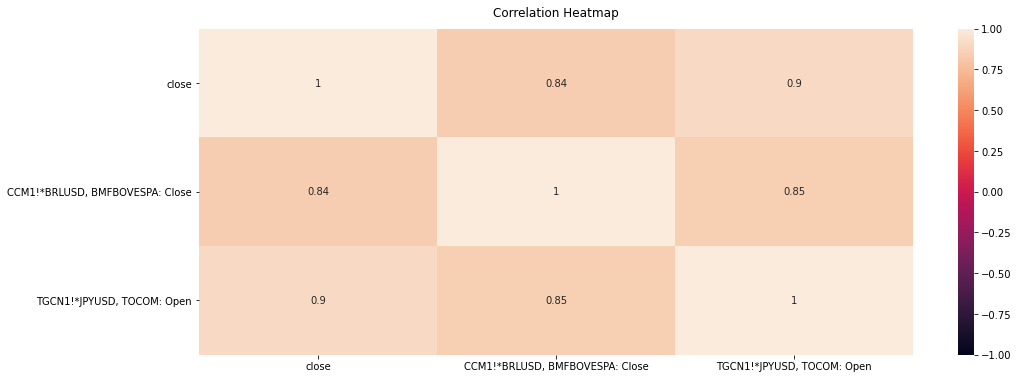

In [205]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(imc_df[['close','CCM1!*BRLUSD, BMFBOVESPA: Close','TGCN1!*JPYUSD, TOCOM: Open']].corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap')

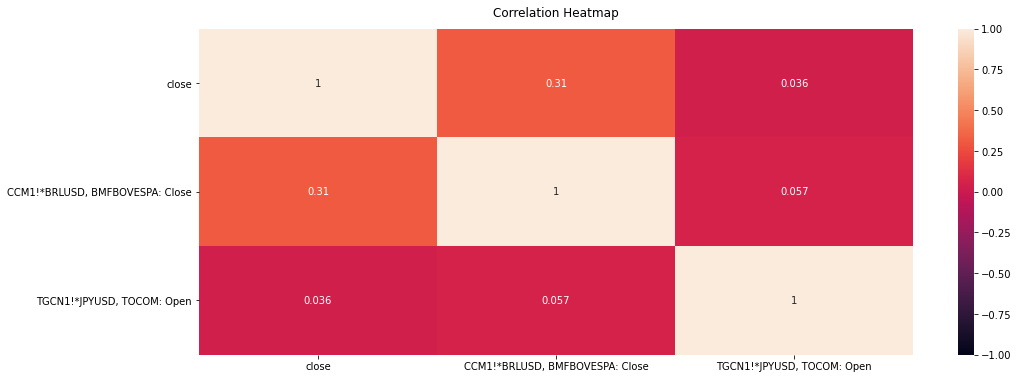

In [206]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

diff_df = np.log(imc_df[['close','CCM1!*BRLUSD, BMFBOVESPA: Close','TGCN1!*JPYUSD, TOCOM: Open']]).diff(1).dropna(axis=0)

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(diff_df[['close','CCM1!*BRLUSD, BMFBOVESPA: Close','TGCN1!*JPYUSD, TOCOM: Open']].corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# PCA - Corn

In [207]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.multivariate.pca import PCA

pca_event = {

    'nComp':3,
    'dataframe':r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\arma_pca\data\CBOT_DL_ZC1!, 1D (5).csv',
    'constant_correlation':True,
    'column':'ZC1!, CBOT: Close',
}

In [208]:
pca_logDiff_df = np.log(imc_df[['close','CCM1!*BRLUSD, BMFBOVESPA: Close','TGCN1!*JPYUSD, TOCOM: Open']]).diff(1).dropna(axis=0)

In [209]:
pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

In [210]:
forecast=0
for i in range(1,pca_event['nComp']):
    forecast+= pc.eigenvecs['eigenvec_'+str(i)][i]*pc.factors['comp_'+str(i)] # I think this could be wrong here RESEARCH AND FIX


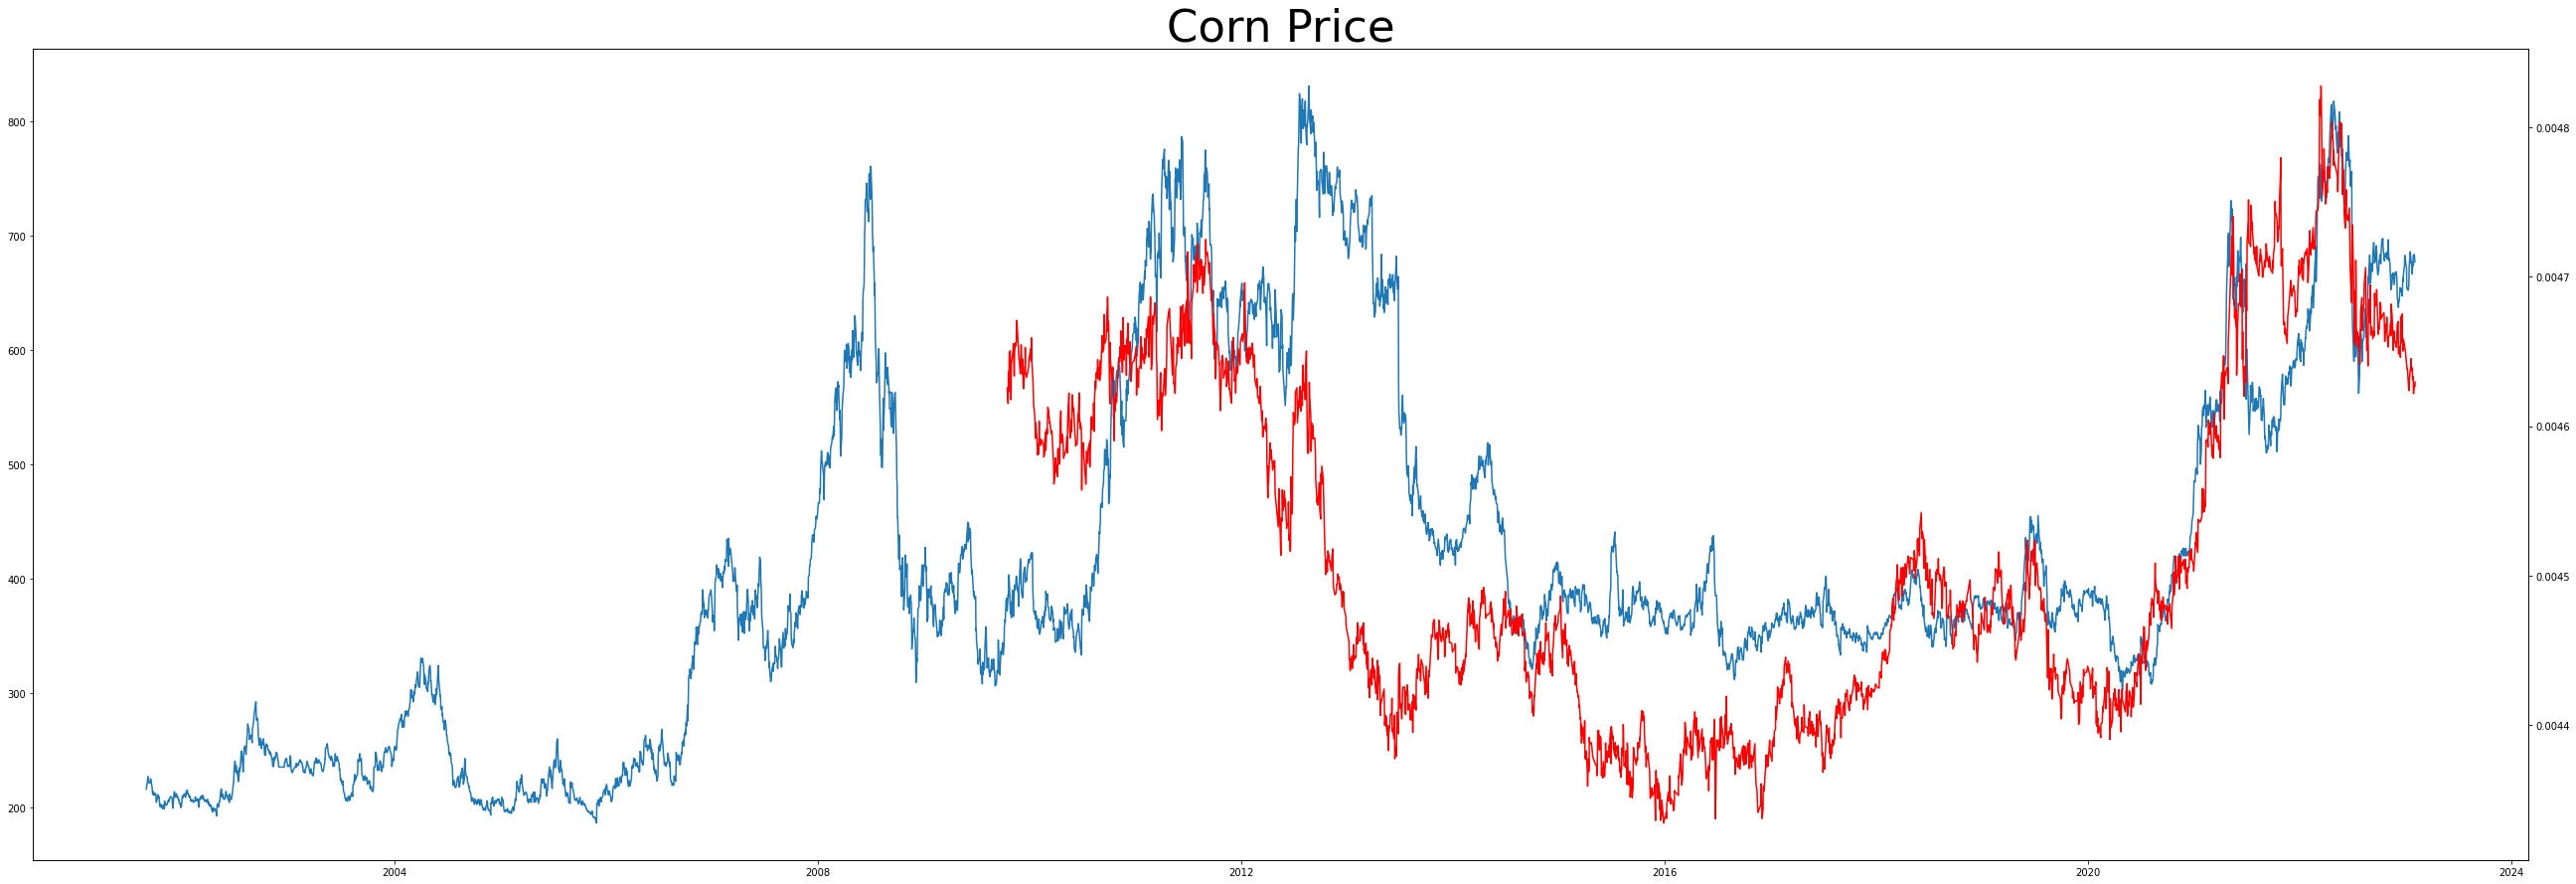

In [211]:
plt.figure(figsize=(45,15))

plt.title('Corn Price',fontsize=45)
plt.plot(imc_df['close'])
plt.twinx()
plt.plot(1/(np.exp(forecast.cumsum())*imc_df['close'][0]),color='red')

plt.show()

# PCA - Soybeans

In [232]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.multivariate.pca import PCA

pca_event = {

    'nComp':2,
    'dataframe':r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\arma_pca\data\CBOT_DL_ZS1!, 1D (2).csv',
    'constant_correlation':True,
    'column':'ZC1!, CBOT: Close',
}

In [233]:
imc_zs_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\arma_pca\data\CBOT_DL_ZS1!, 1D (2).csv',parse_dates=True,index_col='time')

In [234]:
imc_zs_df.columns

Index(['open', 'high', 'low', 'close', 'SOY1!, BMFBOVESPA: Open',
       'SOY1!, BMFBOVESPA: High', 'SOY1!, BMFBOVESPA: Low',
       'SOY1!, BMFBOVESPA: Close', 'SOJ.ROS1!, MATBAROFEX: Open',
       'SOJ.ROS1!, MATBAROFEX: High', 'SOJ.ROS1!, MATBAROFEX: Low',
       'SOJ.ROS1!, MATBAROFEX: Close', 'TGSB1!*JPYUSD, TOCOM: Open',
       'TGSB1!*JPYUSD, TOCOM: High', 'TGSB1!*JPYUSD, TOCOM: Low',
       'TGSB1!*JPYUSD, TOCOM: Close', 'Commercials long', 'Commercials short',
       'Commercials net', 'Large Speculators long', 'Large Speculators short',
       'Large Speculators net', 'Small Speculators long',
       'Small Speculators short', 'Small Speculators net', 'MA',
       'Smoothing Line', 'Volume', 'Volume MA', 'OI', 'Commercials long.1',
       'Commercials short.1', 'Commercials net.1', 'Large Speculators long.1',
       'Large Speculators short.1', 'Large Speculators net.1',
       'Small Speculators long.1', 'Small Speculators short.1',
       'Small Speculators net.1'],
      d

Text(0.5, 1.0, 'Correlation Heatmap')

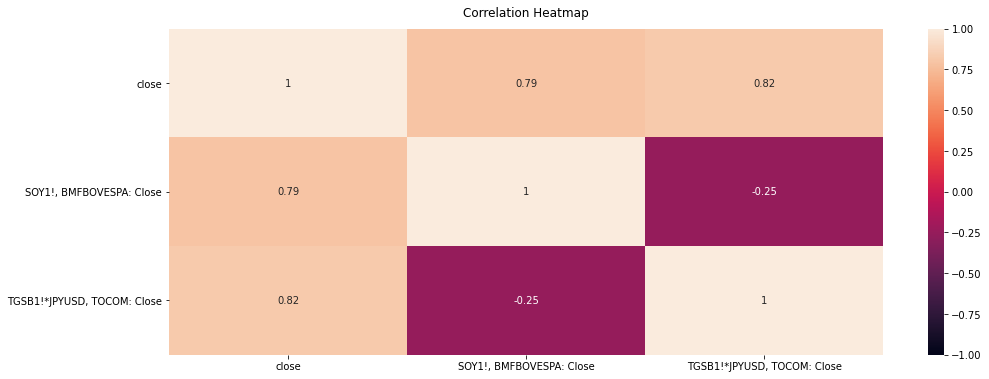

In [235]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(imc_zs_df[['close','SOY1!, BMFBOVESPA: Close','TGSB1!*JPYUSD, TOCOM: Close']].corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap')

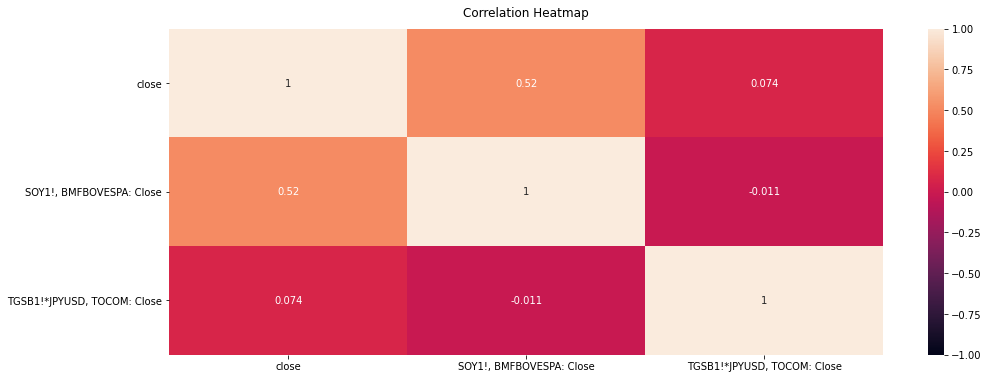

In [236]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

diff_df = np.log(imc_zs_df[['close','SOY1!, BMFBOVESPA: Close','TGSB1!*JPYUSD, TOCOM: Close']]).diff(1).dropna(axis=0)

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(diff_df[['close','SOY1!, BMFBOVESPA: Close','TGSB1!*JPYUSD, TOCOM: Close']].corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [237]:
pca_logDiff_df = np.log(imc_zs_df[['close','SOY1!, BMFBOVESPA: Close','SOJ.ROS1!, MATBAROFEX: Close']]).diff(1).dropna(axis=0)

In [238]:
pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

In [239]:
zs_forecast=0
for i in range(1,pca_event['nComp']):
    zs_forecast+= pc.eigenvecs['eigenvec_'+str(i)][i]*pc.factors['comp_'+str(i)] # I think this could be wrong here RESEARCH AND FIX


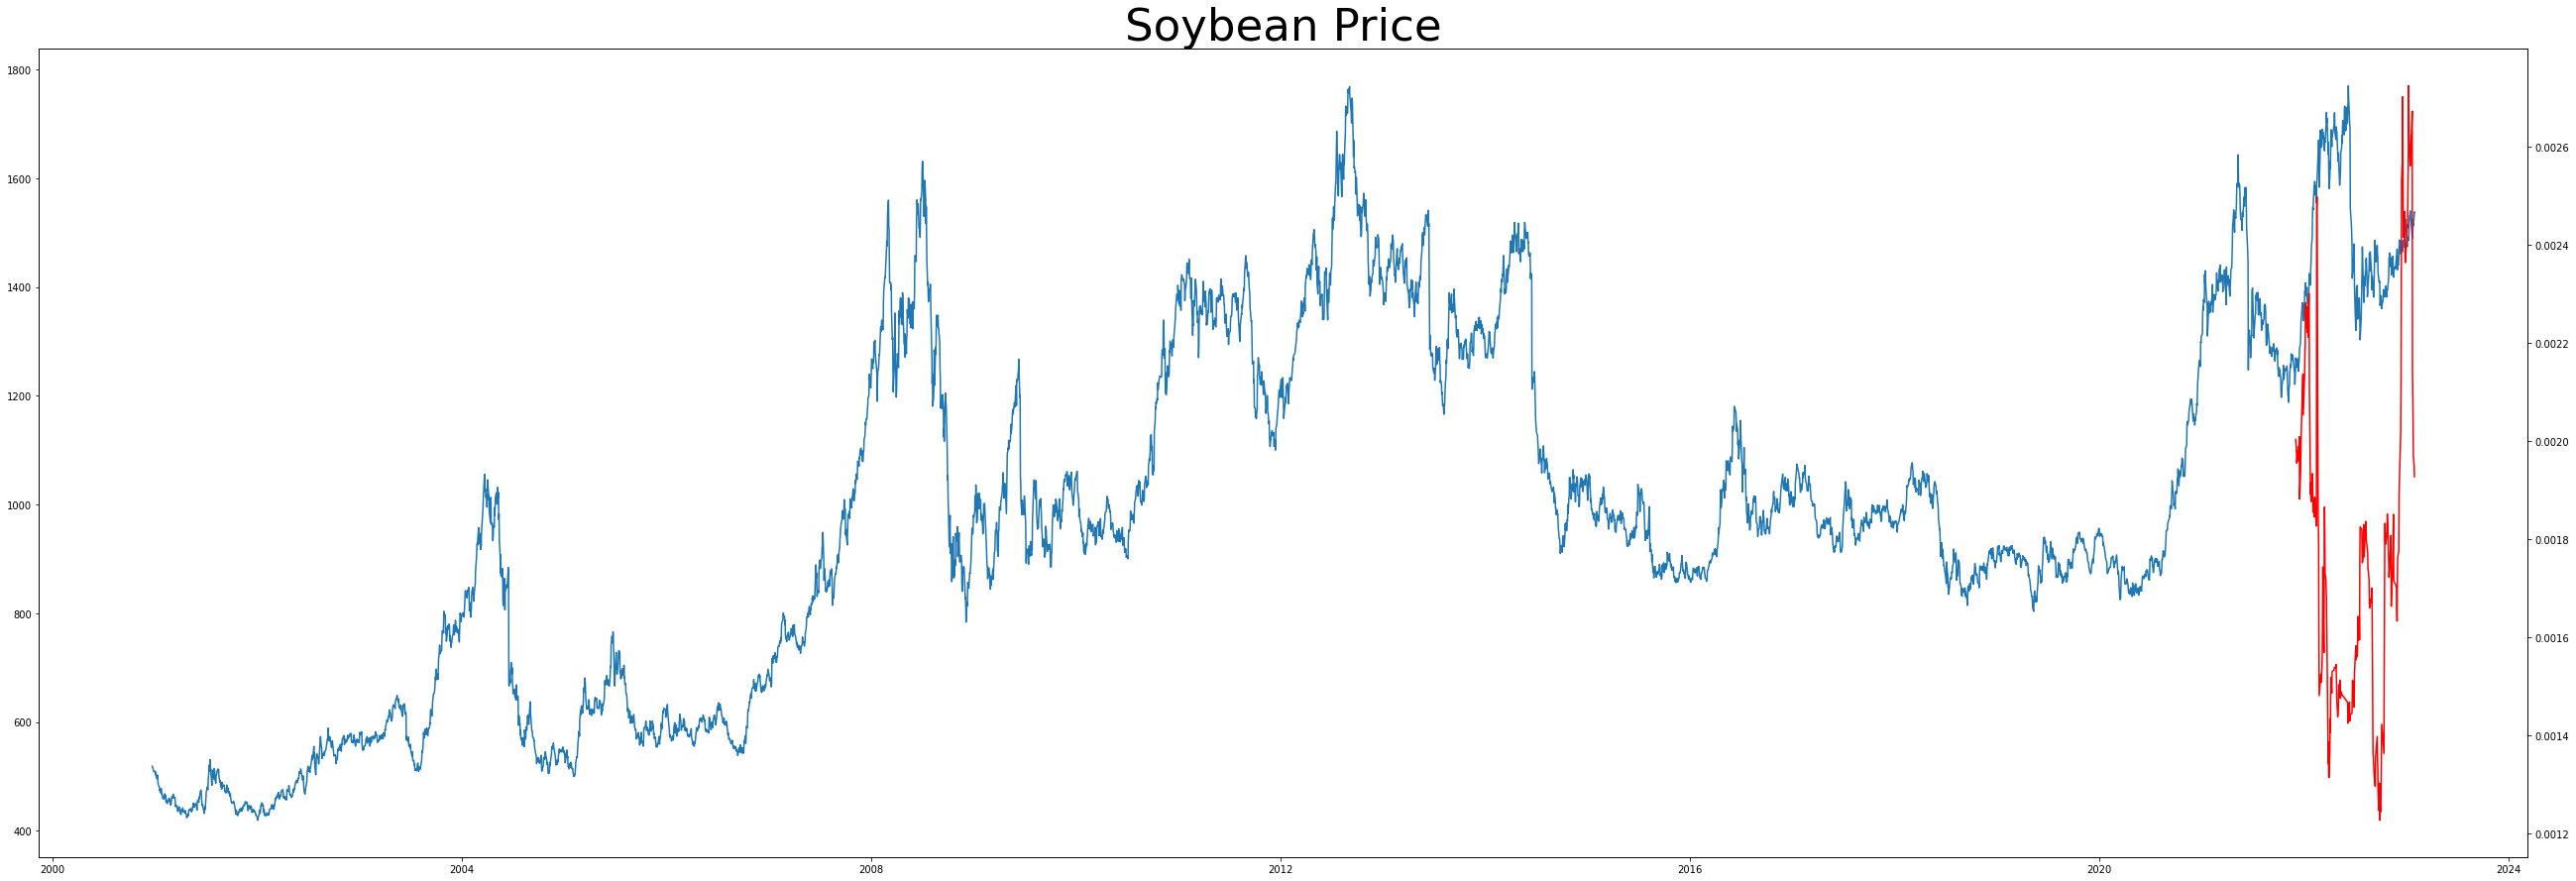

In [240]:
plt.figure(figsize=(45,15))

plt.title('Soybean Price',fontsize=45)
plt.plot(imc_zs_df['close'])
plt.twinx()
plt.plot(1/(np.exp(zs_forecast.cumsum())*imc_zs_df['close'][0]),color='red')

plt.show()

# Compare corn and soybeans

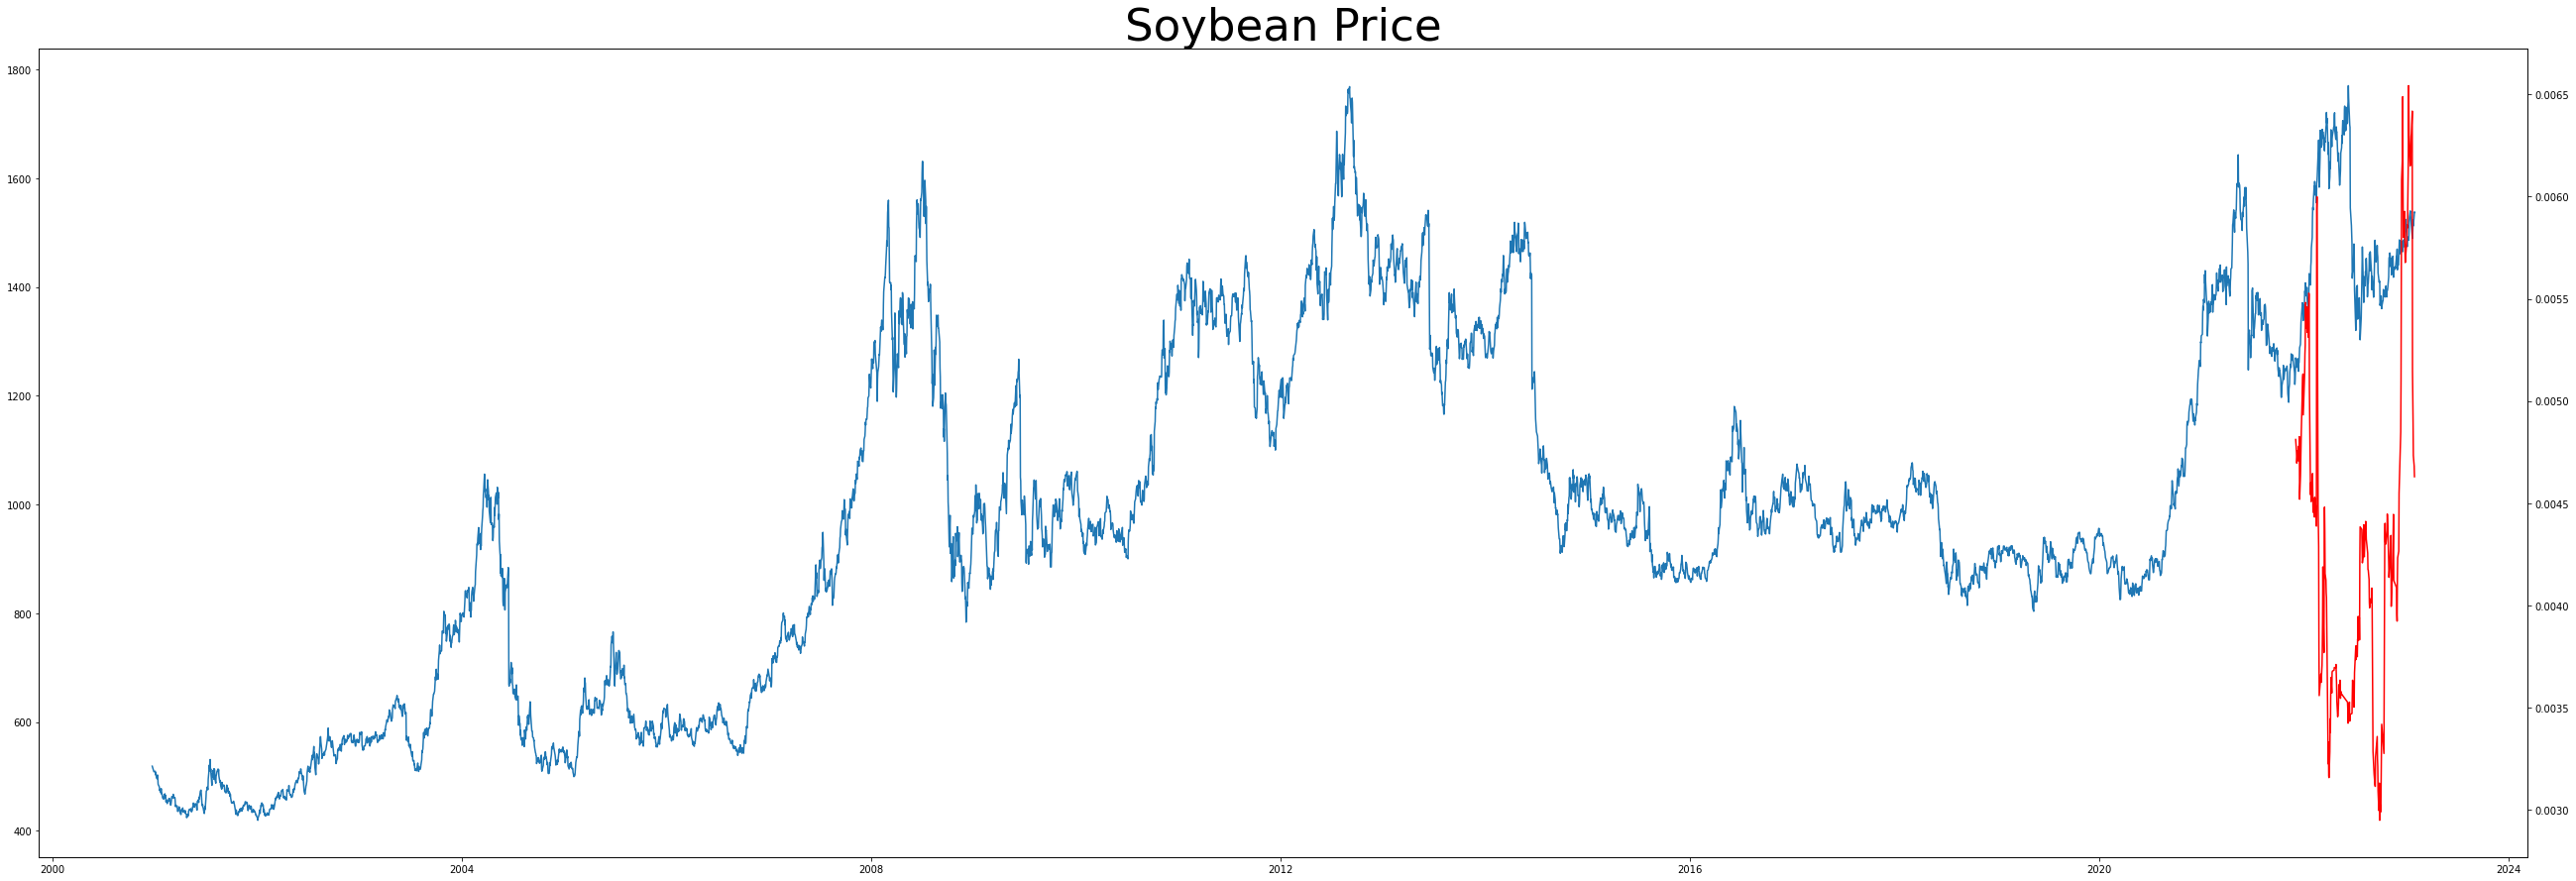

In [241]:
plt.figure(figsize=(45,15))

plt.title('Soybean Price',fontsize=45)
plt.plot(imc_zs_df['close'])
plt.twinx()
plt.plot(1/(np.exp(zs_forecast.cumsum())*imc_df['close'][0]),color='red')

plt.show()

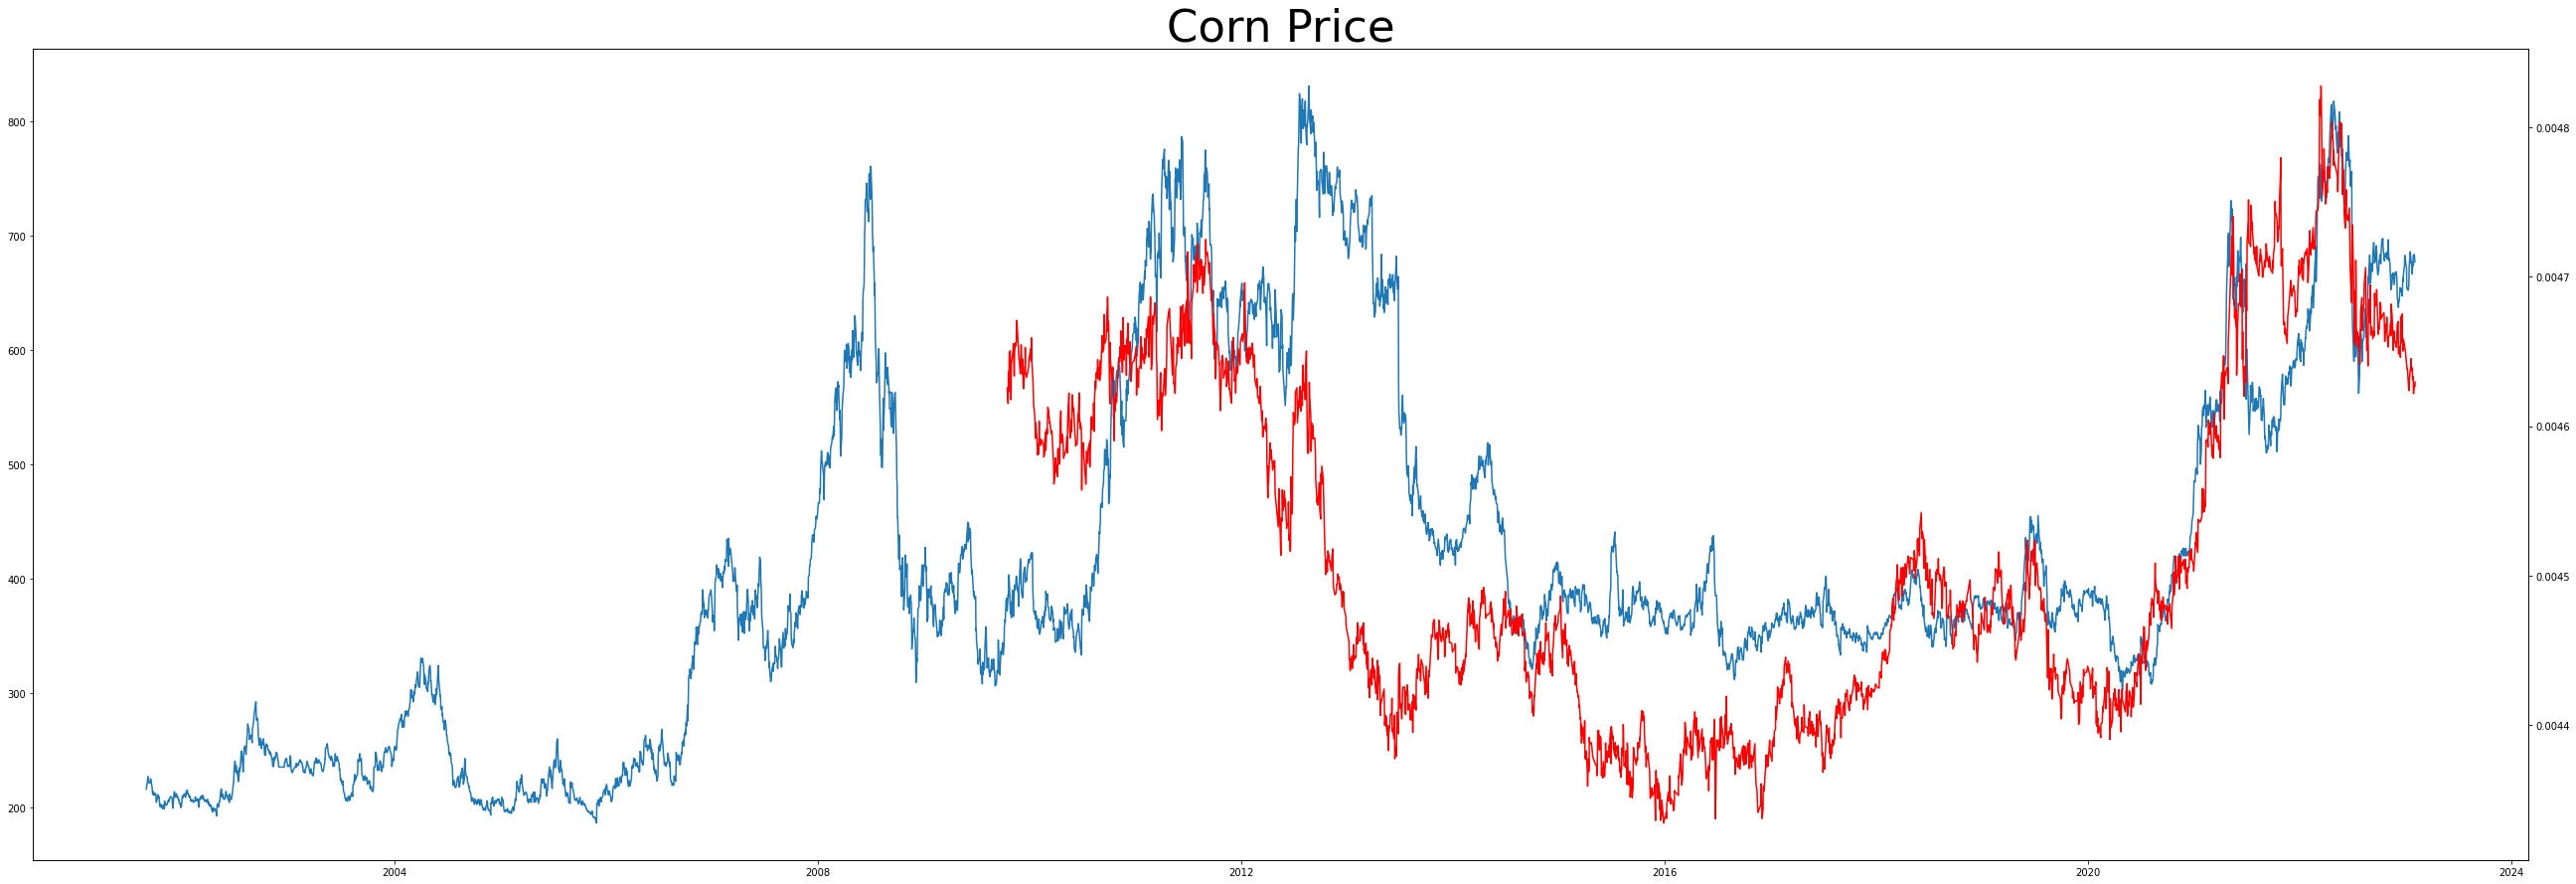

In [242]:
plt.figure(figsize=(45,15))

plt.title('Corn Price',fontsize=45)
plt.plot(imc_df['close'])
plt.twinx()
plt.plot(1/(np.exp(forecast.cumsum())*imc_df['close'][0]),color='red')

plt.show()

# join

In [250]:
join_df = imc_df.join(imc_zs_df['close'],on='time',how='left',lsuffix='_zs')

In [251]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.multivariate.pca import PCA

pca_event = {

    'nComp':4,
    'dataframe':r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\arma_pca\data\CBOT_DL_ZC1!, 1D (5).csv',
    'constant_correlation':True,
    'column':'ZC1!, CBOT: Close',
}

In [252]:
pca_logDiff_df = np.log(join_df[['close','close_zs','CCM1!*BRLUSD, BMFBOVESPA: Close','TGCN1!*JPYUSD, TOCOM: Open']]).diff(1).dropna(axis=0)

In [253]:
pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

In [254]:
forecast=0
for i in range(1,pca_event['nComp']):
    forecast+= pc.eigenvecs['eigenvec_'+str(i)][i]*pc.factors['comp_'+str(i)] # I think this could be wrong here RESEARCH AND FIX


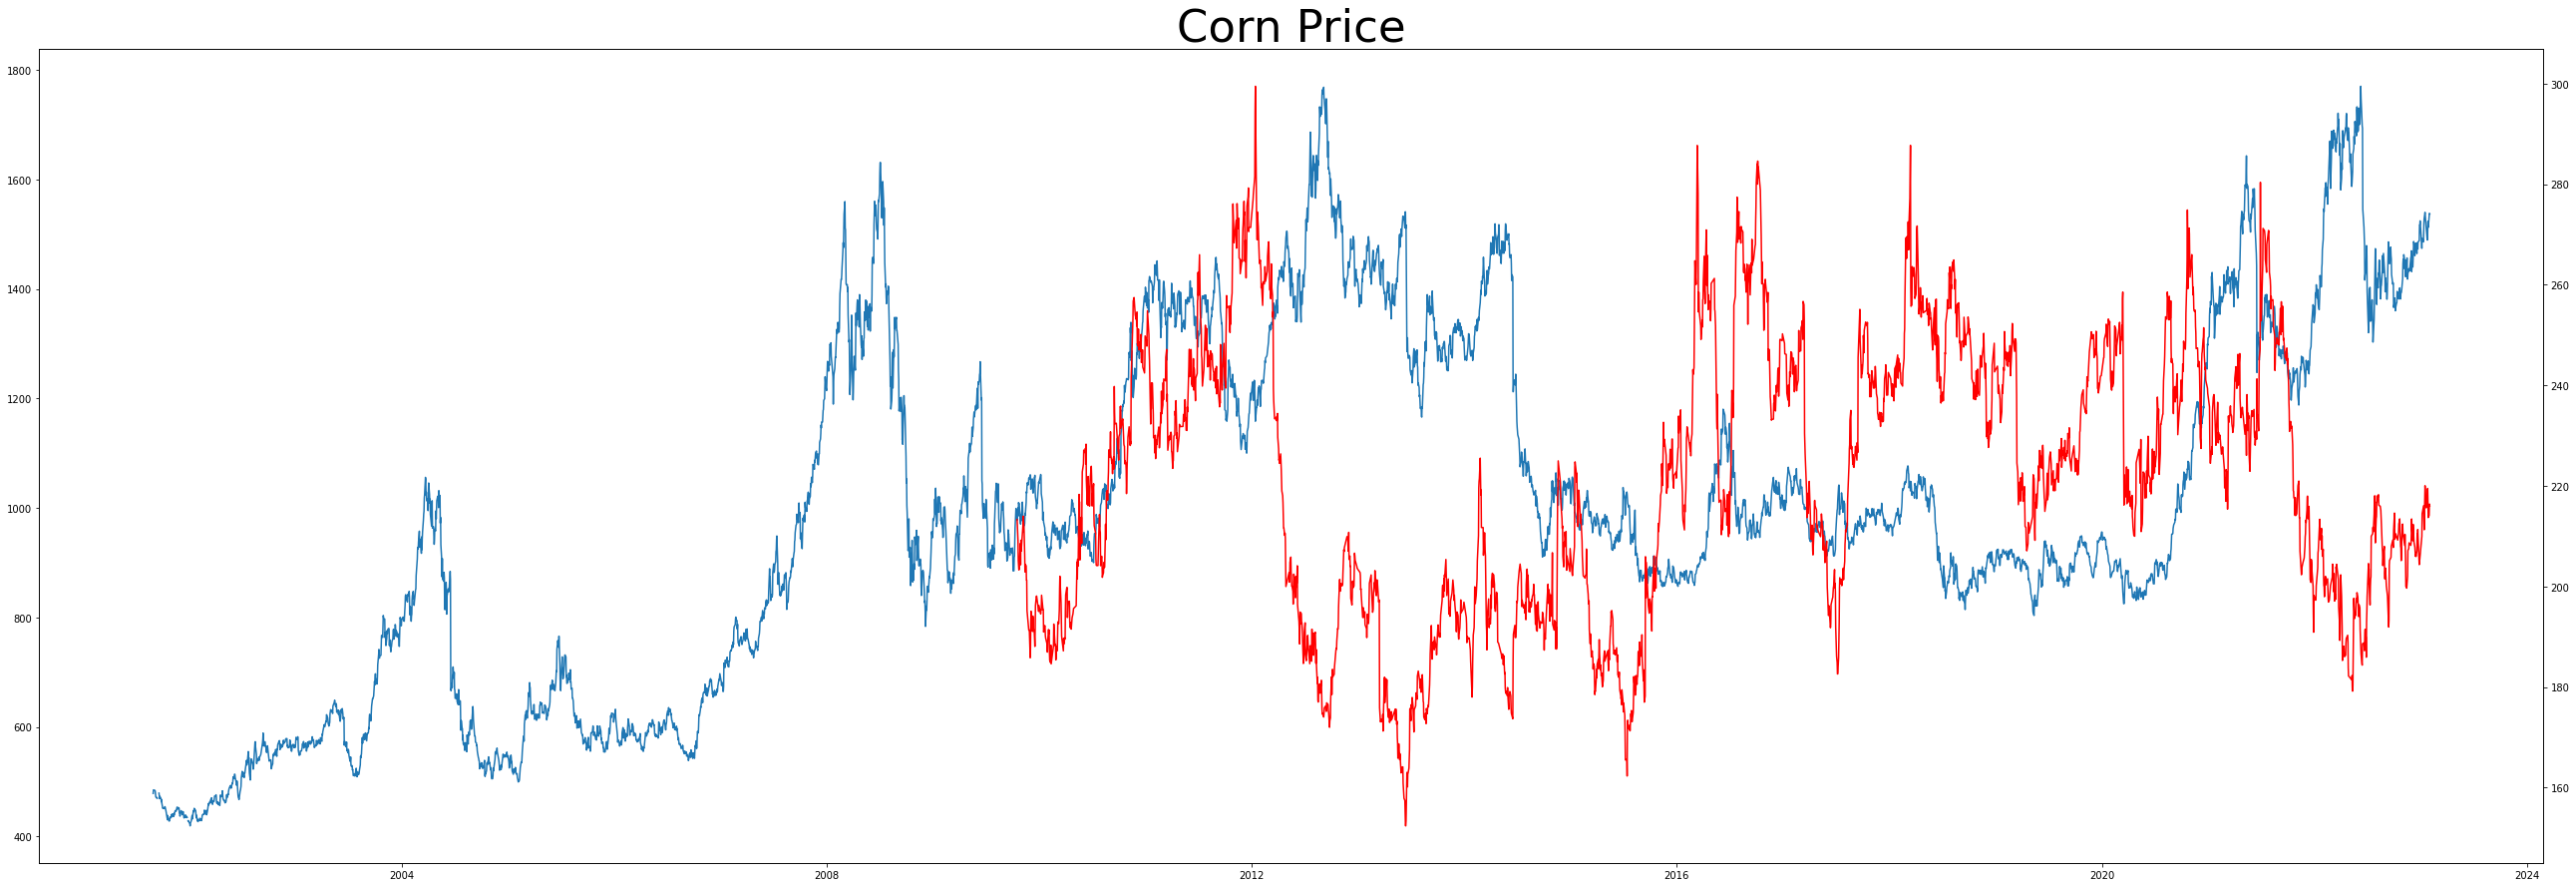

In [256]:
plt.figure(figsize=(45,15))

plt.title('Corn Price',fontsize=45)
plt.plot(join_df['close'])
plt.twinx()
plt.plot((np.exp(forecast.cumsum())*imc_df['close'][0]),color='red')

plt.show()